In [2]:
import pandas as pd
pd.set_option('display.max_columns',None,'display.max_rows',None) 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import statsmodels

# Data Description

The data is compose by 31 columns and 3022 rows, they describe location of the squirrels, physical characteristics (fur), ages and interactions.

I will try to do a segmentation by location of the squirrels,determinate if the color has somenthing to do with the loction where they were spotted, also explore if the interaction change with age or color.

In [3]:
path = './data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv'

In [4]:
df = pd.read_csv(path)

After we import the data we need to have an overview of the main structure , the column types that we have, how many unknown or n/a registers are, if we need to change the type of some varibles (cast) also take a peek of the dataset itself.

In [5]:
df.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')

In [6]:
df["Unique Squirrel ID"].nunique()

3018

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

To make the analysis easier i think that we could use the "Date" column as a proper date, also fill the n/a in some categories will be helpfull for summarizations and plots.

In [8]:
df.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,Combination of Primary and Highlight Color,Color notes,Location,Above Ground Sighter Measurement,Specific Location,Running,Chasing,Climbing,Eating,Foraging,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,Gray+,NaN,Above Ground,10,NaN,False,True,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,Gray+,Nothing selected as Primary. Gray selected as ...,NaN,NaN,NaN,False,False,False,True,True,NaN,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,Gray+Cinnamon,NaN,Above Ground,NaN,on tree stump,False,False,False,False,True,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [9]:
def date_int_str(date):

    str_date = str(date)

    m = str_date[:2]
    d = str_date[2:4]
    y = str_date[4:]

    return '{}-{}-{}'.format(y,m,d)
    

In [10]:
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x : date_int_str(x)))

First things first! is important to know a proper way to segment the data, fur color and age could do the part! , so we may ask ourself what Proportion of the squirrels correspond to each fur color and age?

In [11]:
dict_classes = {'Age':['red','blue'],
                'Primary Fur Color':['black', 'brown','gray']}

In [12]:
def plot_pie_chart(DataFrame,column):
    
    pfc = df.groupby(column).size().reset_index()
    pfc.rename(columns={0:'n'},inplace=True)
    plt.figure(figsize=(10,8))
    plt.pie(pfc['n'],autopct='%1.2f%%', colors=dict_classes[column])
    plt.axis('equal')
    plt.legend(labels=pfc['n'],loc='best',fontsize='12')
    plt.title(column + ' Distribution', fontsize='15',color='w')
    plt.show()
    plt.close()

    return pfc

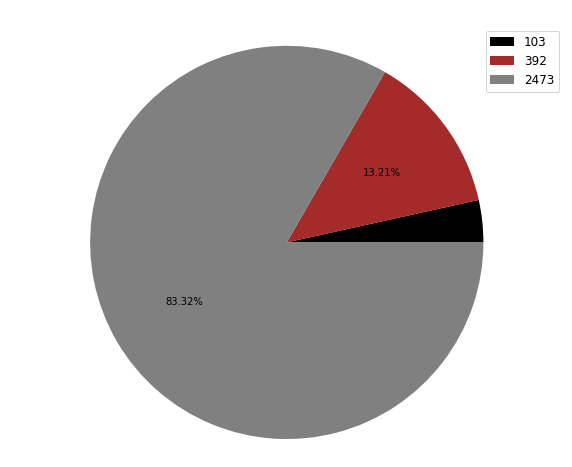

,Primary Fur Color,n
0,Black,103
1,Cinnamon,392
2,Gray,2473


In [13]:
plot_pie_chart(df,'Primary Fur Color')

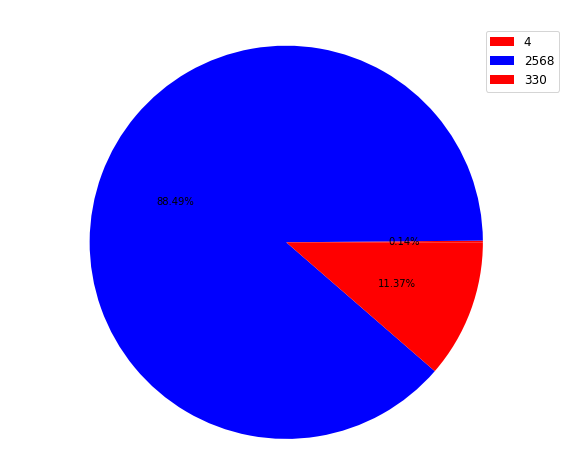

,Age,n
0,?,4
1,Adult,2568
2,Juvenile,330


In [14]:
plot_pie_chart(df,'Age')

Now that we know the way they are divide, it will be nice to see how sparse are they in the dimension of the park? so the question is:

How is the squirrels’ distribution in the park?

To answer this question, for aesthetic pourpuses (location of squirrels)  a rough estimation of the center of each hectare will be made,taking the mean of the X,Y (longitude, latitude).


The first plot is a chess table type with the letter of the hectare in the "x" axis and the number on the "y" axis, the number inside each box is the amount of animal per hectare.

The second one, is an interactive density plot, similar to the first type but this one offers a better representation of the real distribution.

The third one is the location of each animal with their respective color


In [15]:
n_squirrels_by_hectare = df.groupby('Hectare').size().sort_values(ascending=False)
n_squirrels_by_hectare = n_squirrels_by_hectare.to_frame()
n_squirrels_by_hectare.reset_index(inplace = True)
n_squirrels_by_hectare.columns = ['Hectare','n_squirrels']

# Hectares with the most squirrels!

In [16]:
n_squirrels_by_hectare.head(10)

,Hectare,n_squirrels
0,14D,32
1,32E,30
2,14E,28
3,01B,27
4,07H,26
5,13D,25
6,13E,24
7,03D,22
8,33E,22
9,04C,22


In [17]:
hectare_coor = df.groupby('Hectare')['X','Y'].mean()

C:\Users\raperez\AppData\Local\Temp\ipykernel_12232\26159670.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hectare_coor = df.groupby('Hectare')['X','Y'].mean()


In [18]:
hectare_coor_squirrel = pd.merge(hectare_coor,n_squirrels_by_hectare,on = 'Hectare',how = 'inner')

In [19]:
hectare_coor_squirrel.head()

,Hectare,X,Y,n_squirrels
0,01A,-73.980887,40.768198,11
1,01B,-73.980241,40.767892,27
2,01C,-73.979395,40.767560,12
3,01D,-73.978215,40.766933,16
4,01E,-73.977362,40.766524,8


In [20]:
n_squirrels_by_hectare['letter'] = n_squirrels_by_hectare['Hectare'].apply(lambda x:x[-1])
n_squirrels_by_hectare['number'] = n_squirrels_by_hectare['Hectare'].apply(lambda x:int(x[:-1]))
n_squirrels_by_hectare.head(10)

,Hectare,n_squirrels,letter,number
0,14D,32,D,14
1,32E,30,E,32
2,14E,28,E,14
3,01B,27,B,1
4,07H,26,H,7
5,13D,25,D,13
6,13E,24,E,13
7,03D,22,D,3
8,33E,22,E,33
9,04C,22,C,4


In [21]:
hectares = n_squirrels_by_hectare.pivot(index = 'number',columns = 'letter',values='n_squirrels').fillna(0)

# Chees Table Plot

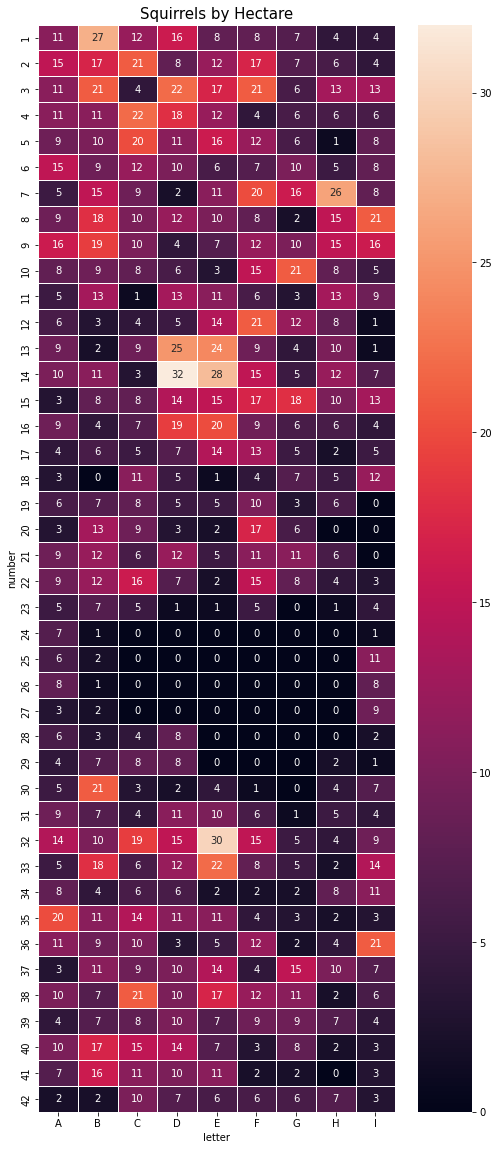

<Figure size 720x576 with 0 Axes>

In [22]:
fig_dims = (8, 20)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(hectares,linewidths=.5,annot=True)
plt.figure(figsize=(10,8))
ax.set_title('Squirrels by Hectare', fontsize='15',color='black')
plt.show()
plt.close()


In [23]:
fig = px.density_mapbox(hectare_coor_squirrel, lat='Y', lon='X', z='n_squirrels', radius=12,
                        center=dict(lon= -73.965957, lat=40.782175), zoom=12,
                        mapbox_style="stamen-terrain",
                        hover_data = ['Hectare','n_squirrels','Y','X'] )

# Density Plot

In [24]:
fig.show()

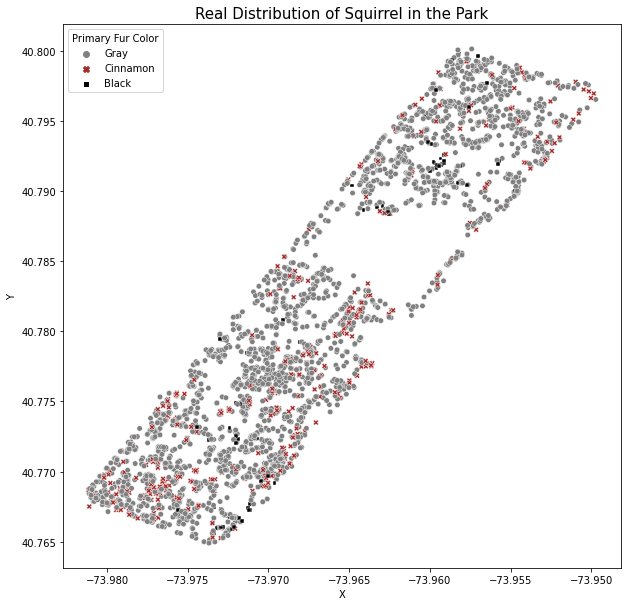

<Figure size 720x576 with 0 Axes>

In [25]:
plt.figure(figsize=(10,10))
ax = plt.axes()
sns.scatterplot(data = df,
                x = 'X',y = 'Y',hue = 'Primary Fur Color',
                s = 30, style='Primary Fur Color',
                palette=['gray','brown','black'])
plt.figure(figsize=(10,8))
ax.set_title('Real Distribution of Squirrel in the Park', fontsize='15',color='black')
plt.show()
plt.close()


In [26]:
df.groupby('Location' ).size()

Location
Above Ground     843
Ground Plane    2116
dtype: int64

### Squirrels no jokin'. We suspect there are organized squirrel gangs (maybe dealing with nuts), can you confirm/deny this?

I can't tell if they are gangs or a union, but the gray squirrels are the top dogs in the park (doing a google research they usually are the most common urban squirrel), in the plot above you guys can see how overwellming is their domain among the black and cinnamon. 

The cinammon ones are grouped in clusters or small groups while the black ones (less common) are spotted in single different spots.

We may assume that the high density spots have resources (food,water)  while the spots with a small o null squirrels are zones destinate to play sports

With the "chesstype plot" between hectare 23 and 30 we see the lack of squirrel presence (THERE IS A HUGE LAKE)

### Does The activities vary by fur color or by age? 

In [27]:
age_activity = df.groupby('Age',as_index = True)['Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging'].sum()
age_activity.reset_index(inplace=True)

fur_activity = df.groupby('Primary Fur Color',as_index = True)['Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging'].sum()
fur_activity.reset_index(inplace=True)


C:\Users\raperez\AppData\Local\Temp\ipykernel_12232\1011028989.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\raperez\AppData\Local\Temp\ipykernel_12232\1011028989.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [28]:
plot_activitie_age = pd.melt(age_activity,id_vars='Age',value_vars = ['Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging'] )

plot_activitie_fur = pd.melt(fur_activity,id_vars= 'Primary Fur Color',value_vars = ['Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging'] )



In [29]:
fur_n_squirrels_dict = dict(zip(df.groupby('Primary Fur Color').size().index,df.groupby('Primary Fur Color').size().values))
age_n_squirrels_dict = dict(zip(df.groupby('Age').size().index,df.groupby('Age').size().values))


In [30]:
fur_n_squirrels_dict

{'Black': 103, 'Cinnamon': 392, 'Gray': 2473}

In [31]:
plot_activitie_fur['pct'] = plot_activitie_fur.apply(lambda x : x.value/fur_n_squirrels_dict[x['Primary Fur Color']],axis = 1)
plot_activitie_age['pct'] = plot_activitie_age.apply(lambda x : x.value/age_n_squirrels_dict[x['Age']],axis = 1)


In this table we can appreciate the different activities made by the squirrel grouped by age

In [32]:
plot_activitie_age

,Age,variable,value,pct
0,?,Running,1,0.250000
1,Adult,Running,625,0.243380
2,Juvenile,Running,82,0.248485
3,?,Chasing,0,0.000000
4,Adult,Chasing,227,0.088396
5,Juvenile,Chasing,38,0.115152
6,?,Climbing,0,0.000000
7,Adult,Climbing,556,0.216511
8,Juvenile,Climbing,86,0.260606
9,?,Eating,0,0.000000


<Figure size 720x720 with 0 Axes>

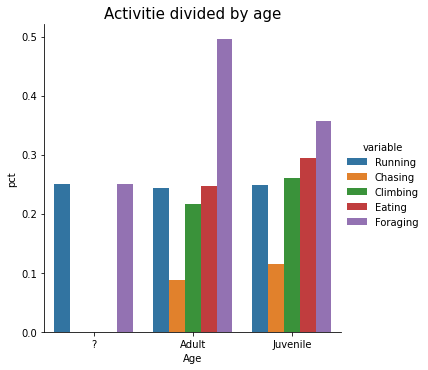

In [33]:
plt.figure(figsize=(10,10))
#ax = plt.axes()
sns.catplot(x="Age", y="pct", hue="variable",
            data=plot_activitie_age,
            kind = 'bar')
plt.title('Activitie divided by age', fontsize='15',color='black')
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

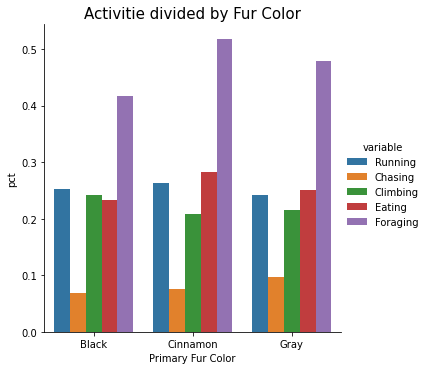

In [34]:
plt.figure(figsize=(10,10))
sns.catplot(x="Primary Fur Color", y="pct", hue="variable",
            data=plot_activitie_fur,
            kind = 'bar')
plt.title('Activitie divided by Fur Color', fontsize='15',color='black')
plt.show()
plt.close()

Almost all activities have the same representation but "foraging" have a bigger percentage in adults, clearly all animals have to look for food but it´s a task tht usually the older or adults do!

It doesn't matter the fur color is almost the same distribution!

In [37]:
fur_shift = df.groupby(['Primary Fur Color','Shift']).size().to_frame().reset_index()


<AxesSubplot:xlabel='Shift', ylabel='0'>

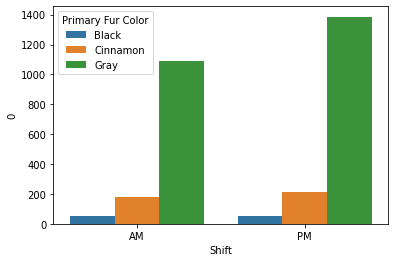

In [38]:
sns.barplot(data = fur_shift, x = 'Shift',y = 0,hue = 'Primary Fur Color')

<AxesSubplot:xlabel='Shift', ylabel='0'>

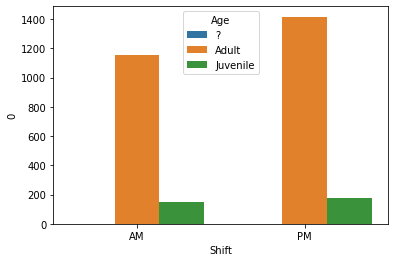

In [39]:
age_shift = df.groupby(['Age','Shift']).size().to_frame().reset_index()
sns.barplot(data = age_shift, x = 'Shift',y = 0,hue = 'Age')

In [40]:
hectare_coor_squirrel = pd.merge(hectare_coor,n_squirrels_by_hectare,on = 'Hectare',how = 'inner')

In [41]:
fur_hectare = df.groupby(['Hectare','Primary Fur Color']).size().to_frame().reset_index()
fur_hectare_n = fur_hectare.groupby('Hectare',as_index=True).size().to_frame().reset_index()
fur_hectare_n.columns = ['Hectare','n_type_fur']

In [42]:
fur_hectare_3 = fur_hectare_n[fur_hectare_n['n_type_fur'] > 2]


In [43]:
fur_hectare_2 = fur_hectare_n[fur_hectare_n['n_type_fur'] == 2]
fur_hectare_1 = fur_hectare_n[fur_hectare_n['n_type_fur'] == 1]
fur_hectare_multi = fur_hectare_n[fur_hectare_n['n_type_fur'] > 1]


In [44]:
fur_hectare_3.shape[0]/fur_hectare_n.shape[0]

0.05917159763313609

In [45]:
fur_hectare_1.shape[0]/fur_hectare_n.shape[0]

0.4319526627218935

In [46]:
fur_hectare_2.shape[0]/fur_hectare_n.shape[0]

0.5088757396449705

In [47]:
hectares_multi = fur_hectare_multi['Hectare'].unique()

In [48]:
fur_hectare_corr = pd.merge(fur_hectare,hectare_coor,on = 'Hectare',how = 'inner')
fur_hectare_corr = fur_hectare_corr [fur_hectare_corr['Hectare'].isin(hectares_multi)]


In [49]:
fur_hectare_corr.head()

,Hectare,Primary Fur Color,0,X,Y
0,01A,Cinnamon,4,-73.980887,40.768198
1,01A,Gray,7,-73.980887,40.768198
2,01B,Cinnamon,7,-73.980241,40.767892
3,01B,Gray,20,-73.980241,40.767892
4,01C,Cinnamon,9,-73.979395,40.767560


In [50]:


fig = px.scatter_mapbox(fur_hectare_corr, lat="Y", lon="X", color="Primary Fur Color", zoom=12, height=300,center=dict(lon= -73.965957, lat=40.782175),size = 0)

fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=6, mapbox_center_lat = 41,
    margin={"r":0,"t":0,"l":0,"b":0})

fig.show()


We can see that just in 6% of the Hectares all three fur colors were spotted, in 50% of the land lots two types were register, the remaining 43% juts one color was spotted(Gray), by this i can asume that they do interacte with eachother but like i say earlier the grays one have the power in numbers!

### Do they interact with humans? Either fur color or age have infulence? The location is a factor for  the interactions?

In [35]:
columns_activities = ['Running', 'Chasing', 'Climbing', 'Eating','Other Activities','Foraging']

In [51]:
interaction_per_hectare = df.groupby('Hectare')['Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Runs from',
       'Other Interactions'].sum().reset_index()

no_interaction_per_hectare = df.groupby('Hectare')['Indifferent'].sum().reset_index()

C:\Users\raperez\AppData\Local\Temp\ipykernel_12232\3010480614.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [61]:

no_interaction_per_hectare['Indifferent'].sum()

1454

In [52]:
interaction_per_hectare = interaction_per_hectare.set_index('Hectare').sum(axis = 1).sort_values(ascending = False).to_frame().reset_index()
interaction_per_hectare.columns = ['Hectare',"n_interactions"]
interaction_per_hectare.head(10)

,Hectare,n_interactions
0,38C,29
1,33D,20
2,38G,19
3,32D,18
4,16E,17
5,07H,17
6,03F,17
7,09B,16
8,30B,15
9,36I,15


In [63]:
interaction_per_hectare['n_interactions'].sum()

1600

In [53]:
n_squirrels_interactions = pd.merge(n_squirrels_by_hectare[['Hectare','n_squirrels']],interaction_per_hectare,on = 'Hectare',how = 'inner')

In [54]:
import plotly.express as px
fig = px.scatter(n_squirrels_interactions, x ='n_squirrels',y = 'n_interactions',trendline="ols")
fig.show()

c:\Users\raperez\Documents\seedtag-data-science-codetest\data-science-test-main\seedtag\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



### Conclusions

    * Gray Squirrels are the ones how have control inside the park
    * Most interactions are in the hectare number 30 and 38, maybe in this areas people sparse, lay on the grass and have a chill day
    * Adult Squirrels look for food more than younger ones.
    * Usually with more squirrels sopotted more interaction we have.
    * There were 1454 squirrels that had som sort of interaction with humans and 1600 interactions with humans, so there is almos a 50% chance that some squirrels interact with you!